# Bank Data - Term Deposite

In [1]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
#importing data
bankdata = pd.read_csv("bank-full.csv",sep=';')

In [3]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bankdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<p> So there are no missing values in the dataset.<p>

In [5]:
# Converting categorical data(yes/no) to numerical data(1/0) 
bankdata['default'] =bankdata.default.map(dict(yes=1,no=0))
bankdata['loan'] = bankdata.loan.map(dict(yes=1,no=0))
bankdata['housing'] = bankdata.housing.map(dict(yes=1,no=0))
bankdata['y'] = bankdata.y.map(dict(yes=1,no=0))

In [6]:
bankdata.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [7]:
#help(pd.get_dummies)

In [8]:
# Creating dummy variables for other categorical data
bank_dummy =pd.get_dummies(bankdata[['job', 'marital', 'education', 'contact', 'month', 'poutcome']])

In [9]:
bank_dummy.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [10]:
#Dropping columns for which we created dummies
bankdata.drop(['job', 'marital', 'education', 'contact', 'month', 'poutcome'],inplace=True,axis=1)

In [11]:
#merging dummies into bank data df
bankdata= pd.concat([bankdata,bank_dummy],axis=1)

In [12]:
bankdata.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


### Train | Test Split and Scaling

In [13]:
X = bankdata.drop('y',axis=1)
y =bankdata['y']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [16]:
scaler =StandardScaler()

In [17]:
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.transform(X_test)

### Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_model = LogisticRegression()

In [20]:
log_model.fit(scaled_Xtrain,y_train)

LogisticRegression()

In [21]:
log_model.coef_

array([[ 0.00326864, -0.00690299,  0.03650802, -0.35023068, -0.13403461,
         0.10267582,  1.05397029, -0.27446073,  0.01416836,  0.02192653,
         0.04833315, -0.05299489, -0.02659746, -0.07218303,  0.00839696,
         0.09769054, -0.0056597 , -0.01593243,  0.06879173, -0.0078863 ,
        -0.01067606, -0.0169253 ,  0.00541047, -0.05854916,  0.0598412 ,
        -0.07798456, -0.01684366,  0.07781516,  0.00472459,  0.33423947,
         0.13030748, -0.42434874,  0.09267216, -0.10831221,  0.06585205,
         0.05420965, -0.15718646, -0.1642989 ,  0.26201842,  0.20261069,
        -0.02080579, -0.1520473 ,  0.14269865,  0.11880712, -0.05767776,
        -0.00574246,  0.36797168, -0.11790937]])

### Model Performance

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [23]:
y_pred = log_model.predict(scaled_Xtest)

In [31]:
print("Model Accuracy : {:.2f}".format(accuracy_score(y_test,y_pred)))

Model Accuracy : 0.91


In [25]:
confusion_matrix(y_test,y_pred)

array([[11691,   276],
       [ 1012,   585]], dtype=int64)

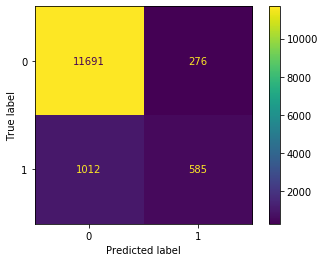

In [26]:
plot_confusion_matrix(log_model,scaled_Xtest,y_test)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.68      0.37      0.48      1597

    accuracy                           0.91     13564
   macro avg       0.80      0.67      0.71     13564
weighted avg       0.89      0.91      0.89     13564



In [33]:
from sklearn.metrics import plot_roc_curve

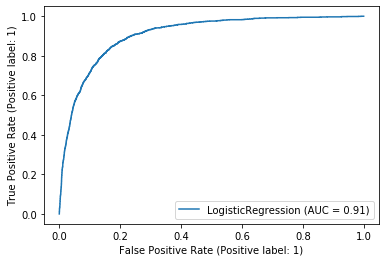

In [34]:
plot_roc_curve(log_model,scaled_Xtest,y_test)

### From above we can say that model performs very well to predict True negative but its performance metrics for False Positive and True Postive must be improved. 